# Import libraries

In [135]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Import data

In [105]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [106]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

# Mutual information

In [108]:
mi = mutual_info_regression(X_train, y_train)

Text(0.5, 1.0, 'Mutual information between predictors and target')

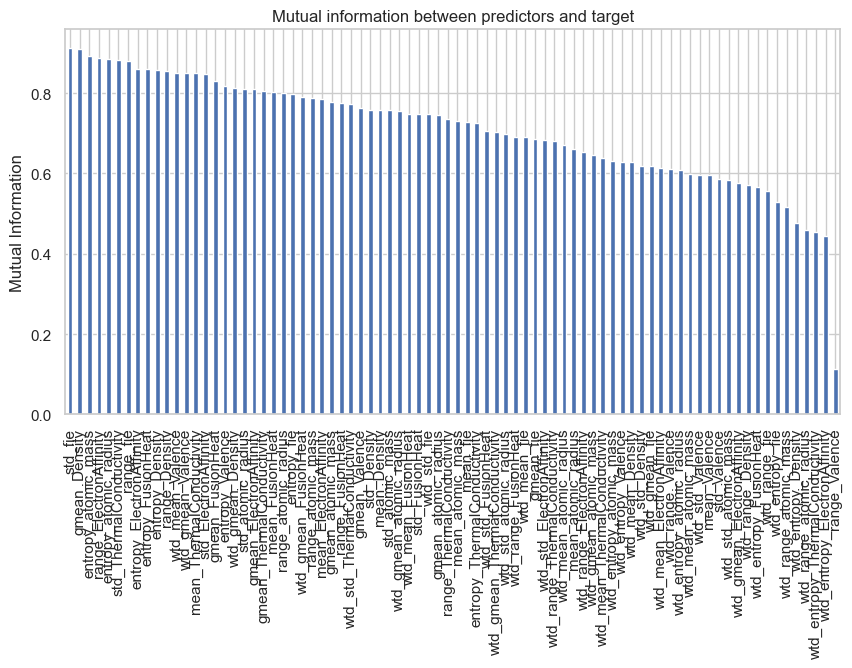

In [109]:
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [110]:
sel = SelectPercentile(mutual_info_regression,
                       percentile=70).fit(X_train, y_train)

# display the features
X_train.columns[sel.get_support()]

Index(['mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'range_atomic_mass', 'std_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'entropy_fie', 'range_fie',
       'std_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density',
       'range_Density', 'std_Density', 'mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'range_FusionHeat', 'wtd_range_FusionHeat',
       'std_FusionHeat', 'wtd_std_FusionHe

In [111]:
X_train_m = sel.transform(X_train)
X_test_m = sel.transform(X_test)

In [112]:
X_train_m = pd.DataFrame(X_train, columns=sel.get_feature_names_out())
X_test_m = pd.DataFrame(X_test, columns=sel.get_feature_names_out())

X_train_m.head()

,mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,entropy_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence
15511,55.373780,18.464990,12.621306,0.683843,105.41206,43.098264,950.333333,1034.773098,918.814666,1.063757,...,4.651179,0.693425,90.81950,37.925750,38.963777,35.470359,2.614130,2.000000,2.112285,0.955700
2892,72.816957,52.075936,35.756780,0.838545,122.90607,50.602625,866.400000,1015.201551,808.929244,1.029822,...,0.592118,0.140516,399.97342,56.402156,185.567013,137.850150,2.282087,2.289428,2.242349,1.078992
3650,71.885607,60.708840,32.373992,1.811361,121.32760,35.914688,699.014286,996.111539,663.564846,1.886926,...,1.054309,1.144411,399.97342,61.524149,137.774946,142.685658,2.123077,2.245649,2.102339,1.927392
9028,104.365600,72.746865,42.654930,1.129463,184.59060,70.392496,891.650000,1014.844325,838.584885,1.328085,...,0.790837,0.270718,399.97342,47.775848,169.524558,127.993444,2.000000,2.000000,2.000000,1.386294
19291,85.856759,80.031150,72.474689,1.534555,96.11900,34.981246,711.860000,791.682800,696.141845,1.587255,...,51.921398,1.445288,86.00000,26.836000,30.676375,22.255101,3.736000,3.245342,3.567305,1.564370


In [113]:
X_train_m.shape, X_test_m.shape

((16954, 56), (4239, 56))

# Scaling

In [114]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_m)

X_test_sc=min_max_scaler.fit_transform(X_test_m)

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

In [116]:
y_train_sc

array([[0.0136205 ],
       [0.17297203],
       [0.27026944],
       ...,
       [0.0156205 ],
       [0.00335022],
       [0.48972915]])

# Baseline model

In [117]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor

In [118]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)

In [119]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [137]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

TypeError: 'numpy.float64' object is not callable

# Cross-Validation

In [121]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [22]:



list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'neg_mean_squared_error', 'neg_mean_absolute_error'])

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_sc,
        y=y_train_sc,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
        cv=30,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = [
        np.mean(cv_result['fit_time']),
        np.mean(cv_result['score_time']),
        np.mean(cv_result['test_neg_mean_squared_error']) * -1,
        np.mean(cv_result['test_neg_mean_absolute_error'])  # Removed the negative sign here
    ]

print(cv_results)

                            fit_time  score_time  neg_mean_squared_error  \
RandomForestRegressor      90.699407    0.031867                0.002688   
XGBRegressor               13.941474    0.003774                0.002934   
KNeighborsRegressor         0.011224    0.091431                0.003785   
LGBMRegressor               1.148956    0.005318                0.003211   
SVR                         5.157123    0.307576                0.007008   
DecisionTreeRegressor       0.933704    0.001439                0.004381   
GradientBoostingRegressor  29.402921    0.002359                0.004989   

                           neg_mean_absolute_error  
RandomForestRegressor                    -0.028702  
XGBRegressor                             -0.031913  
KNeighborsRegressor                      -0.034282  
LGBMRegressor                            -0.035839  
SVR                                      -0.064009  
DecisionTreeRegressor                    -0.033907  
GradientBoostingRegr

# RandomForestRegressor

In [122]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred = model.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred)
mae = mean_absolute_error(y_test_sc, y_pred)
r2 = r2_score(y_test_sc, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_14084\377911579.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.006989011991372419
Mean Absolute Error (MAE): 0.058012716170042056
R-squared (R2): 0.7972062402752434


# XGBRegressor

In [136]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred = model.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred)
mae = mean_absolute_error(y_test_sc, y_pred)
r2 = r2_score(y_test_sc, y_pred)
mape = mean_absolute_percentage_error(y_test_sc, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.0062001416587789395
Mean Absolute Error (MAE): 0.05366694179262162
R-squared (R2): 0.820096168190582
mape: 8.14760102982076


In [134]:
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape = mean_absolute_percentage_error(y_test_sc, y_pred)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 0.0062001416587789395
Mean Absolute Error (MAE): 0.05366694179262162
R-squared (R2): 0.820096168190582
Mean Absolute Percentage Error (MAPE): 2529.014440667658


# TUNING

In [131]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor


model = XGBRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#  Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_sc, y_train_sc)


best_params_grid = grid_result.best_params_
best_score_grid = grid_result.best_score_

# Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_result = random_search.fit(X_train_sc, y_train_sc)


best_params_random = random_result.best_params_
best_score_random = random_result.best_score_

print("Best Hyperparameters (Grid Search):", best_params_grid)
print("Best MSE Score (Grid Search):", best_score_grid)

print("Best Hyperparameters (Random Search):", best_params_random)
print("Best MSE Score (Random Search):", best_score_random)

Best Hyperparameters (Grid Search): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}
Best MSE Score (Grid Search): -0.002810425161762044
Best Hyperparameters (Random Search): {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best MSE Score (Random Search): -0.002989864911224696


In [132]:
best_model = XGBRegressor(
    n_estimators=150,
    learning_rate=0.2,
    max_depth=7,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)


best_model.fit(X_train_sc, y_train_sc)


y_pred = best_model.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred)
mae = mean_absolute_error(y_test_sc, y_pred)
r2 = r2_score(y_test_sc, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.007188686725268609
Mean Absolute Error (MAE): 0.05789194208361234
R-squared (R2): 0.7914124614036613


In [124]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np


scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform(y_pred.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0            38.0    28.770880
1            13.4    15.600076
2            69.5    73.102150
3            92.8    69.957962
4            68.0    80.786034
...           ...          ...
4234        101.1    93.267891
4235         87.5    60.198456
4236          5.1     5.370173
4237         36.0    19.367340
4238         24.6    17.048914

[4239 rows x 2 columns]


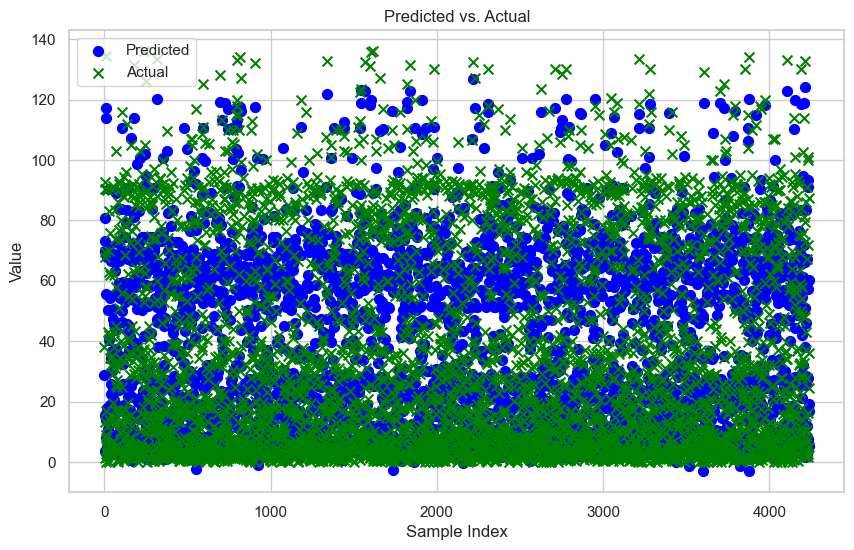

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x_indexes = range(len(result_df))


point_size = 50


plt.scatter(x_indexes, result_df['y_pred_unsc'], label='Predicted', color='blue', s=point_size, marker='o')


plt.scatter(x_indexes, result_df['y_test_unsc'], label='Actual', color='green', s=point_size, marker='x')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Predicted vs. Actual')
plt.legend()

plt.show()